In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

vars = ['Flow Duration', 'Flow Packets/s', 'Flow Bytes/s']
xlabel = 'Type of Attack'
day = 'Tuesday'

fig_w = 24
fig_h = 18

def draw_plots(df: pd.DataFrame):

    fig, axs = plt.subplots(len(vars))
    fig.set_size_inches(fig_w / 3, fig_h)
    fig.set(facecolor='white')
    sb.axes_style('whitegrid')

    # Labels for filtering
    labels: list = df['Label'].unique().tolist()
    # Labels for figures
    plot_labels = labels.copy()
    plot_labels.insert(0, '')

    # Draw plots by rows
    row = 0
    for var in vars:
        try:
            labels_order = ['BENIGN', 'Abnormal']

            # Draw Boxplot
            sb.boxplot(data=df, x='Label', y=var, ax=axs[row], boxprops={
                       'zorder': 3, 'facecolor': 'none'}, width=0.2,
                       order=labels_order)

            # Draw Violinplot
            palette = {label: "#4C90F0" if label == "BENIGN" else "#E76A6E" for label in df["Label"]}
            sb.violinplot(data=df, x='Label', y=var, ax=axs[row], palette=palette,
                          order=labels_order, width=0.6)
            for violin in axs[row].collections:
                bbox = violin.get_paths()[0].get_extents()
                x0, y0, width, height = bbox.bounds
                violin.set_clip_path(plt.Rectangle(
                    (x0, y0), width / 2, height, transform=axs[row].transData))

            # Draw Stripplot
            old_len_collections = len(axs[row].collections)
            sb.stripplot(x='Label', y=var, data=df, palette=palette, dodge=False,
                         ax=axs[row], size=2, order=labels_order)
            for dots in axs[row].collections[old_len_collections:]:
                dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))

            axs[row].set_xlabel(xlabel)
            axs[row].set_ylabel(f'Log({var})')
        except ValueError as e:
            print(e)

        row += 1



In [2]:
import networkx as nx
from math import floor

def draw_gnn(given_dataframe):
    # Prepare data
    sources = given_dataframe['Source IP'].to_list()
    destinations = given_dataframe['Destination IP'].to_list()
    labels = given_dataframe['Label'].to_list()
    rates = given_dataframe['Flow Bytes/s'].to_list()

    # Prepare figure
    fig, axs = plt.subplots()
    fig.set_size_inches(fig_w, fig_h)
    fig.set(facecolor='white')

    # Create new directed graph
    G = nx.DiGraph()
    # Add IP nodes
    G.add_nodes_from(sources)
    G.add_nodes_from(destinations)

    # Add Rate edges
    edge_labels = {}
    attack_nodes = []
    red_hex = '#E76A6E'
    blue_hex = '#4C90F0'
    for source, destination, label, rate in zip(sources, destinations, labels, rates):
        try:
            color = blue_hex if label == 'BENIGN' else red_hex
            if label != 'BENIGN':
                attack_nodes.append(source)
            edge_labels[(source, destination)] = floor(rate)
            G.add_edge(u_of_edge=source, v_of_edge=destination, color=color)
        except:
            pass

    # Add Node colors
    color_list = []
    for node in G.nodes:
        if node in attack_nodes:
            color_list.append(red_hex)
        else:
            color_list.append(blue_hex)

    # Draw graph
    pos = nx.circular_layout(G)
    colors = nx.get_edge_attributes(G, 'color').values()
    
    nx.draw(G, pos=pos, with_labels=True, font_color = "black", node_color=color_list, edge_color=colors, width = 2.0, font_size=12)
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=12)
    
    

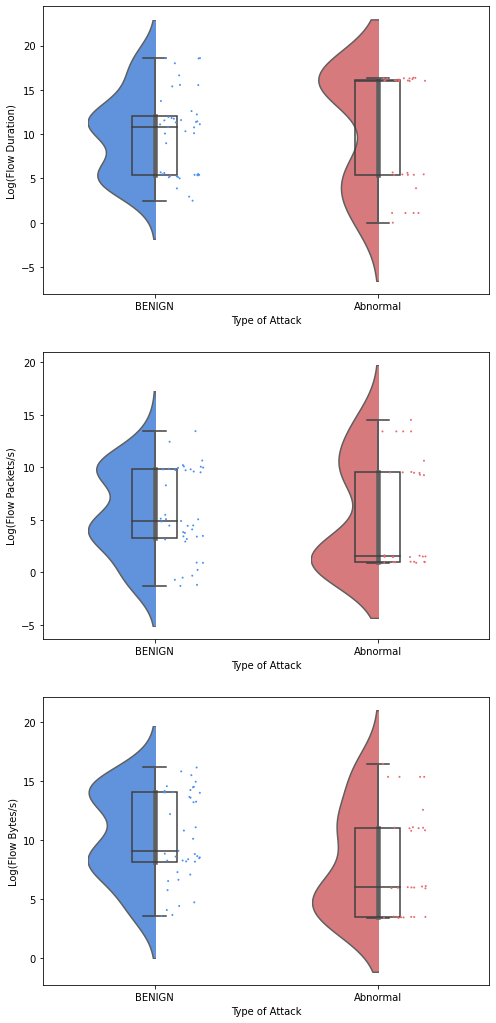

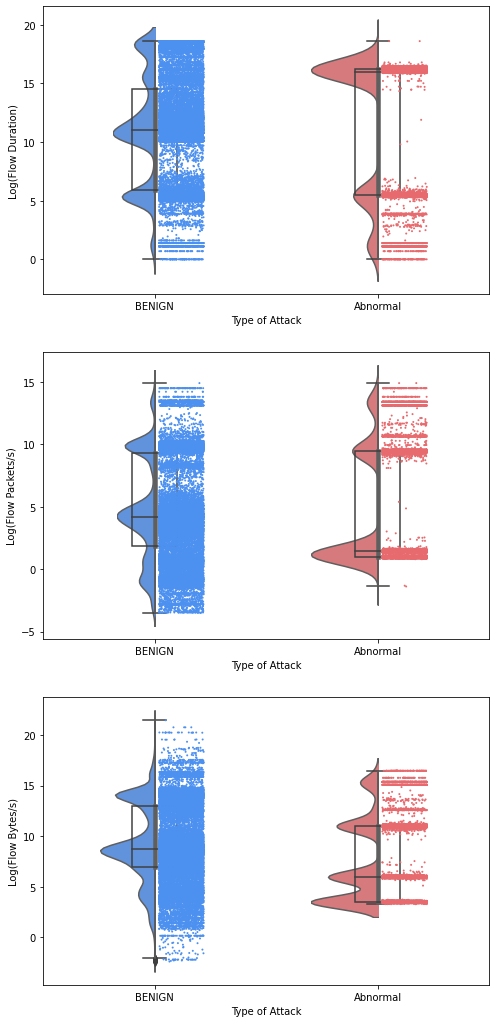

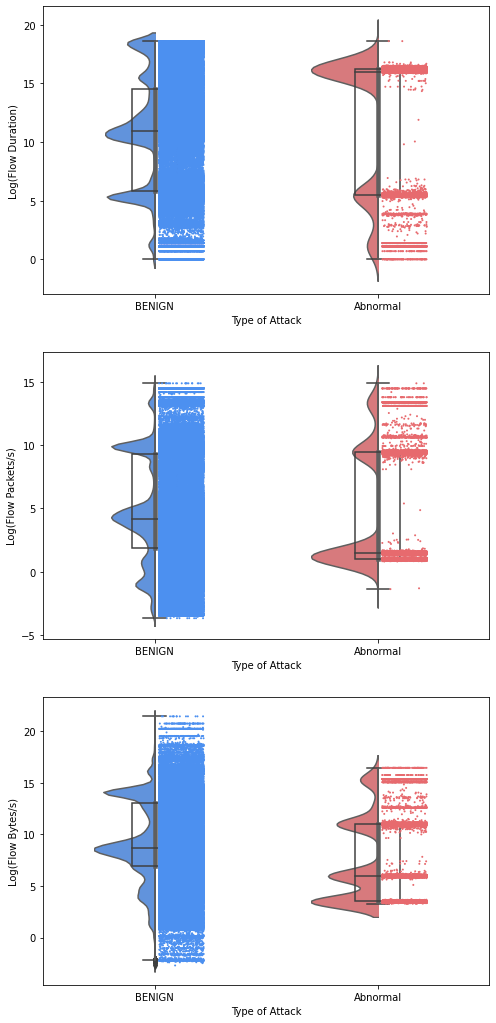

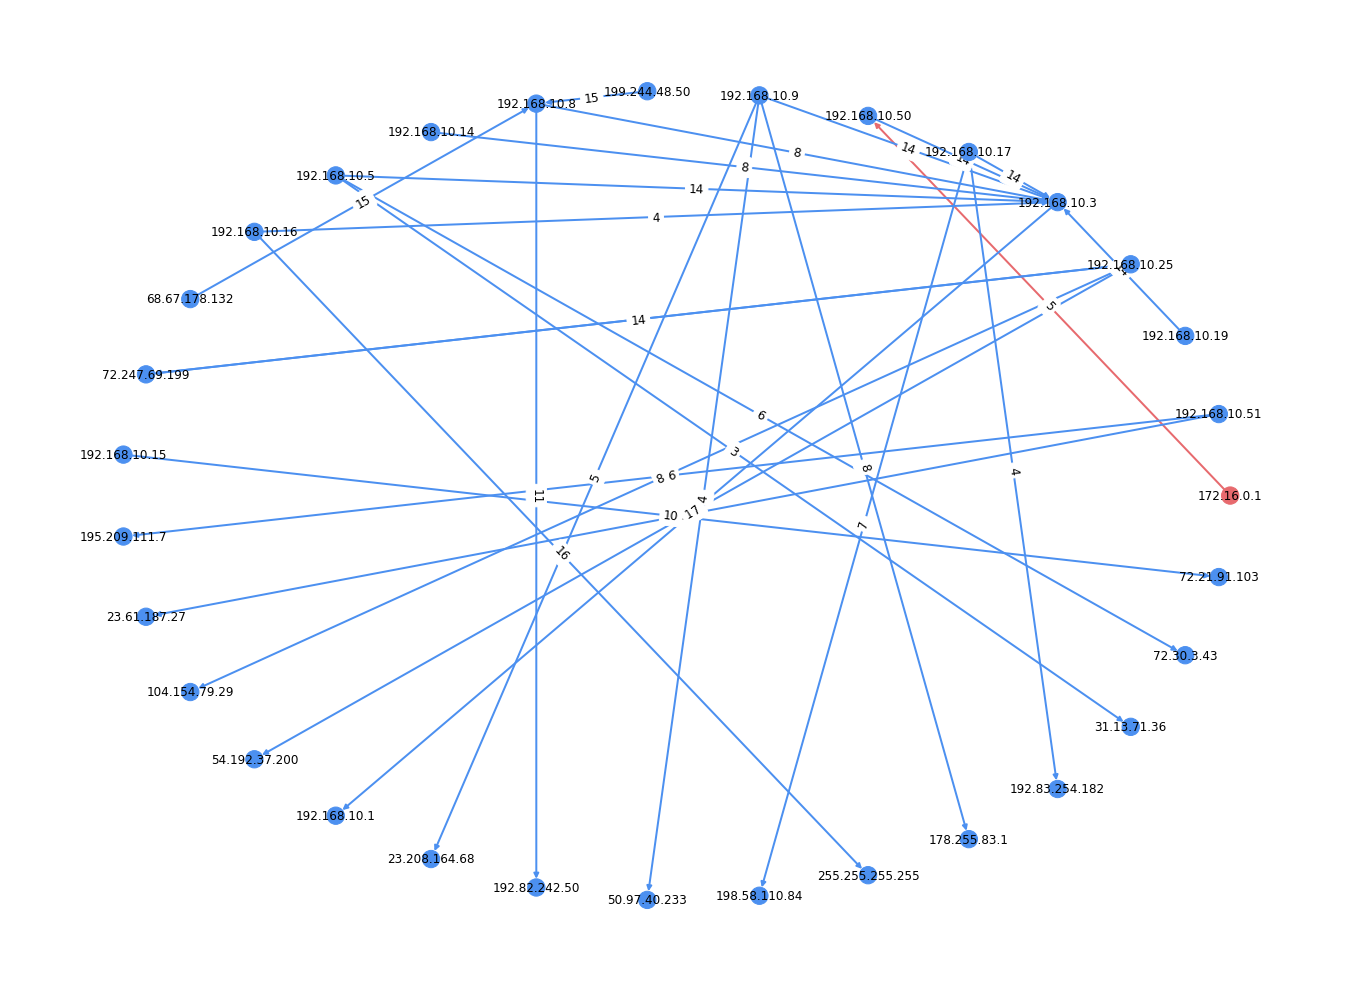

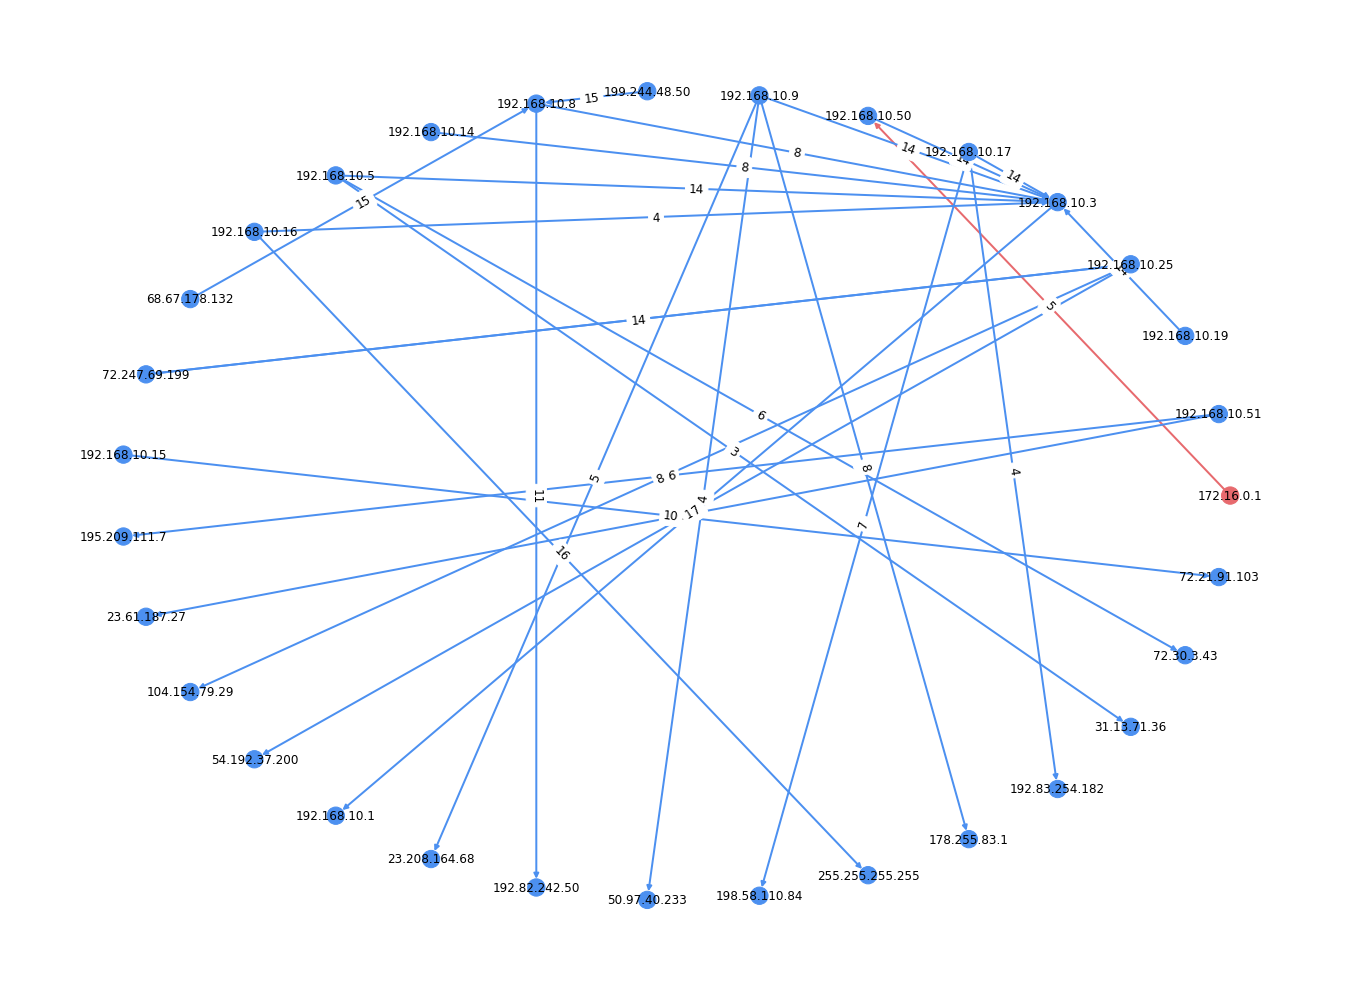

In [3]:


randomsample_df = pd.read_csv('./balanceTue.csv')
draw_plots(randomsample_df)


balance_df = pd.read_csv('./logTue.csv')
draw_plots(balance_df)

log_raw_df = pd.read_csv('./afterlogTue.csv')
draw_plots(log_raw_df)

predict_df = pd.read_csv('./predicted.csv')
actual_df = pd.read_csv('./actual.csv')

draw_gnn(predict_df)
draw_gnn(actual_df)